<a href="https://colab.research.google.com/github/2021-FIIT-Bc-projects/BP-Fagan-CNN-Huby/blob/main/Experiment_EfficientNetB1_8vs8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import numpy as np

from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/8vs8"
data_dir = pathlib.Path(data_dir)

batch_size = 64
img_height = 240
img_width = 240

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15296 files belonging to 16 classes.
Using 13002 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15296 files belonging to 16 classes.
Using 2294 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['E_Amanita_crocea', 'E_Boletus_reticulatus', 'E_Cantharellus_cibarius', 'E_Coprinus_comatus', 'E_Craterellus_cornucopioides', 'E_Helvella_crispa', 'E_Macrolepiota_procera', 'E_Pleurotus_ostreatus', 'P_Amanita_muscaria', 'P_Amanita_pantherina', 'P_Amanita_virosa', 'P_Gyromitra_esculenta', 'P_Hypholoma_fasciculare', 'P_Lactarius_torminosus', 'P_Mycena_pura', 'P_Tricholoma_terreum']


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

KeyboardInterrupt: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
b0 = EfficientNetB1(input_shape=(240, 240, 3), weights='imagenet', include_top=False, classifier_activation="softmax") 

27033600/27018416 [==============================] - 0s 0us/step


In [ ]:
for layer in b0.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(b0.output)

In [ ]:
prediction = Dense(16, activation='softmax')(x)

model = Model(inputs=b0.input, outputs=prediction)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.988357 to fit



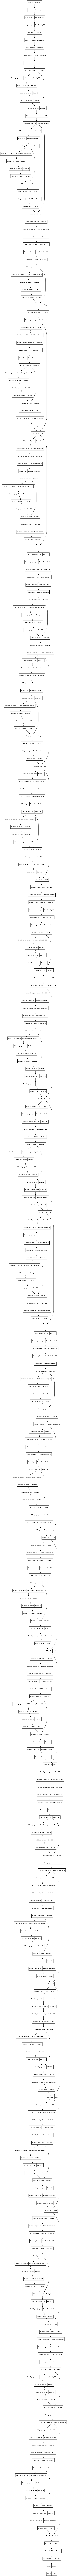

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 240, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 240, 240, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 241, 241, 3)  0           ['normalization[0][0]']      

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  batch_size=64,shuffle=True)

Epoch 1/10
204/204 [==============================] - 3903s 19s/step - loss: 1.3503 - accuracy: 0.8441 - val_loss: 0.6345 - val_accuracy: 0.9255
Epoch 2/10
204/204 [==============================] - 109s 520ms/step - loss: 0.3740 - accuracy: 0.9564 - val_loss: 0.7328 - val_accuracy: 0.9364
Epoch 3/10
204/204 [==============================] - 108s 515ms/step - loss: 0.2318 - accuracy: 0.9719 - val_loss: 0.7209 - val_accuracy: 0.9499
Epoch 4/10
204/204 [==============================] - 107s 509ms/step - loss: 0.1417 - accuracy: 0.9833 - val_loss: 0.6504 - val_accuracy: 0.9503
Epoch 5/10
204/204 [==============================] - 107s 511ms/step - loss: 0.1602 - accuracy: 0.9818 - val_loss: 0.7327 - val_accuracy: 0.9547
Epoch 6/10
204/204 [==============================] - 107s 511ms/step - loss: 0.1483 - accuracy: 0.9852 - val_loss: 0.7616 - val_accuracy: 0.9534
Epoch 7/10
204/204 [==============================] - 107s 510ms/step - loss: 0.2202 - accuracy: 0.9805 - val_loss: 0.7937 - 

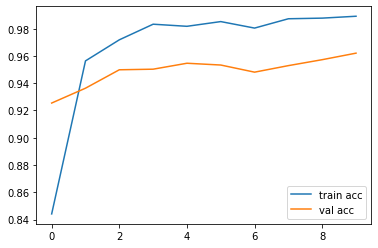

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

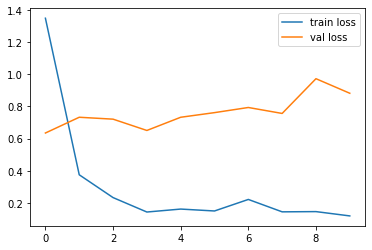

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
test_path="/content/drive/MyDrive/Colab Notebooks/test_5vs5"

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 543 files belonging to 16 classes.


In [ ]:
model.evaluate(test_ds,batch_size=64)

9/9 [==============================] - 109s 457ms/step - loss: 0.8367 - accuracy: 0.9374


[0.8367260694503784, 0.9373849034309387]

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  labels='inferred',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 543 files belonging to 16 classes.


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

array([[14,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 15,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  1,  0, 64,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 70,  0,  0,  1,  0,  1,  1,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 65,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  2,  1, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 1,  2,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_EfficientNetB1_acc_valacc_testacc.h5') 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model_EfficientNetB1_acc_valacc_testacc.h5')

In [ ]:
new_model.summary()

In [ ]:
loss, acc = new_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))